In [29]:
from keras.utils import np_utils
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Activation
import numpy as np

In [15]:
np.random.seed(3)

# 1. 데이터셋 준비하기

# 훈련셋과 시험셋 로딩
(X_train, Y_train), (X_test, Y_test) = fashion_mnist.load_data()

X_train = X_train.reshape(60000, 784).astype('float32') / 255.0
X_test = X_test.reshape(10000, 784).astype('float32') / 255.0

In [16]:
# 라벨링 전환
Y_train = np_utils.to_categorical(Y_train)
Y_test = np_utils.to_categorical(Y_test)

In [17]:
# 2. 모델 구성하기
model = Sequential()
model.add(Dense(units=32, input_dim=28*28, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

In [18]:
# 3. 모델 엮기
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [19]:
# 4. 모델 학습시키기
hist = model.fit(X_train, Y_train, epochs=100, batch_size=32)

Epoch 1/100
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7101 - accuracy: 0.8102
Epoch 2/100
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3540 - accuracy: 0.8998
Epoch 3/100
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3086 - accuracy: 0.9125
Epoch 4/100
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2833 - accuracy: 0.9202
Epoch 5/100
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2641 - accuracy: 0.9254
Epoch 6/100
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2482 - accuracy: 0.9306
Epoch 7/100
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2350 - accuracy: 0.9343
Epoch 8/100
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2229 - accuracy: 0.9378
Epoch 9/100
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2123 - accuracy: 0.9401
Epoch 10/100
1875/1875 [==============================] - 6s 3ms/step - l

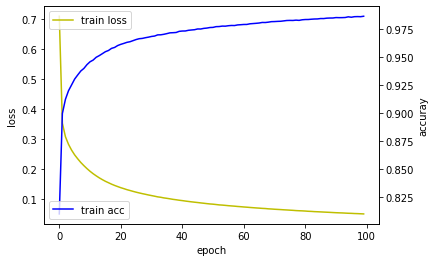

In [20]:
# 5. 모델 학습 과정 표시하기
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [47]:
np.random.seed(3)

# 1. 데이터셋 준비하기

# 훈련셋과 시험셋 로딩
(X_train, Y_train), (X_test, Y_test) = fashion_mnist.load_data()

# 훈련셋과 검증셋 분리
X_val = X_train[100:]
Y_val = Y_train[100:]
X_train = X_train[:100]
Y_train = Y_train[:100]

X_train = X_train.reshape(100, 784).astype('float32') / 255.0
X_val = X_val.reshape(59900, 784).astype('float32') / 255.0
X_test = X_test.reshape(10000, 784).astype('float32') / 255.0

In [48]:
# 라벨링 전환
Y_train = np_utils.to_categorical(Y_train)
Y_val = np_utils.to_categorical(Y_val)
Y_test = np_utils.to_categorical(Y_test)

In [49]:
# 2. 모델 구성하기
model = Sequential()
model.add(Dense(units=32, input_dim=28*28, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

In [50]:
# 3. 모델 엮기
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [51]:
# 4. 모델 학습시키기
hist = model.fit(X_train, Y_train, epochs=100, batch_size=32, validation_data=(X_val, Y_val))

Epoch 1/100
4/4 [==============================] - 5s 2s/step - loss: 2.2639 - accuracy: 0.1900 - val_loss: 2.2593 - val_accuracy: 0.1854
Epoch 2/100
4/4 [==============================] - 4s 1s/step - loss: 2.1384 - accuracy: 0.2400 - val_loss: 2.1960 - val_accuracy: 0.2346
Epoch 3/100
4/4 [==============================] - 5s 2s/step - loss: 2.0678 - accuracy: 0.2800 - val_loss: 2.1461 - val_accuracy: 0.2412
Epoch 4/100
4/4 [==============================] - 5s 2s/step - loss: 1.9847 - accuracy: 0.3600 - val_loss: 2.0757 - val_accuracy: 0.3164
Epoch 5/100
4/4 [==============================] - 5s 2s/step - loss: 1.9366 - accuracy: 0.4400 - val_loss: 2.0256 - val_accuracy: 0.3515
Epoch 6/100
4/4 [==============================] - 5s 2s/step - loss: 1.8677 - accuracy: 0.4500 - val_loss: 1.9898 - val_accuracy: 0.3477
Epoch 7/100
4/4 [==============================] - 4s 1s/step - loss: 1.8061 - accuracy: 0.4400 - val_loss: 1.9515 - val_accuracy: 0.3640
Epoch 8/100
4/4 [=================

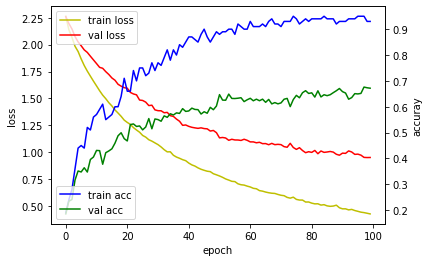

In [52]:
# 5. 모델 학습 과정 표시하기
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()